# Hi-Kod Veri Bilimi Atölyesi Mezuniyet Projesi
## COVİD'in Psikolojik Etkilerinin Araştırılması

Veri Kümesi Hakkında
İnsanların karantinaya ilişkin görüşlerini anlamak için 2020'de yapılan anketin yanıtları. Veri kümesi Google Formlar yardımıyla toplandı. Veriler, insanlar tarafından sağlanan çeşitli soruların yanıtlarını içerir. Formdaki soruların çoğu, büyük/küçük harfe duyarlı sorunlardan kaçınmak için çoktan seçmeli olarak sunuldu. Bu veri seti bir araştırma makalesi yayınlamak için kullanıldı.


## Bu Projede Neler Var?
1. [Verinin İçeriği](#1)
1. [Kütüphanelerin İndirimesi](#2)
1. [Verinin Yüklenmesi ve İncelenmesi](#3)
1. [Veri Temizleme ve Ön İşleme](#4)
   1. Kayıp Değerlerin Tespiti
   1. Gereksiz Değişkenlerin Çıkarılması
   1. Değerlerin Kontrolü
1. [Veri Görselleştirme](#5)
   1. Tek Değişen Analizi
   1. Çoklu Değişen Analizi
1. [Modelleme](#6)
   1. Logistic Regression
   1. K- Nearest Neighbors
   1. Decision Tree
   1. Random Forest
   1. Support Vector Machine

<a id="1"></aa>
### Verinin İçeriği
* **age:** Kişinin yaş grubu    
* **gender:** Kişinin cinsiyeti   
* **occupation:** Kişinin çalıştığı meslek/sektör   
* **line_of_work:** Kişinin gerçekleştirdiği iş kolu   
* **time_bp:** Pandemiden önce işte geçirilen süre  
* **time_dp:** Pandemi sırasında işte geçirilen süre    
* **travel_time:** Harcanan seyahat süresi   
* **easyof_online:** Çevrimiçi çalışmanın derecelendirmesi  
* **home_env:** Ev ortamını sevme    
* **prod_inc:** Verimlilik artışı değerlendirmesi   
* **sleep_bal:** Uyku döngüsünün derecelendirilmesi   
* **new_skill:** Herhangi bir yeni becerinin öğrenilip öğrenilmediği  
* **fam_connect:** Kişinin ailesiyle ne kadar iyi bağlantı kurduğunu derecelendirilmesi 
* **relaxed:** Kişinin ne kadar rahat hissettiğinin derecelendirilmesi  
* **self_time:** Ne kadar kişisel zaman elde edildiğinin değerlendirilmesi   
* **like_hw:** Evden çalışmayı sevmek    
* **dislike_hw:** Evden çalışmayı sevmemek    
* **prefer:** Kişinin evden/ofisten çalışma tercihi    
* **certaindays_hw:** Belirli günlerin evden çalışmanın gerekli olup olmadığını beğenmek     
* **X:** Özel Sütun   
* **time_bp.1:** Özel Sütun   
* **travel_new:** Özel Sütun  
* **net_diff:** Özel Sütun 

<a id="2"></aa>
### Kütüphanelerin İndirimesi 

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

<a id="3"></aa>
### Verinin Yüklenmesi ve İncelenmesi

In [2]:
data= pd.read_csv("C:/Users/Selin Şahin/Desktop/psyco.csv")

In [3]:
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [5]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

In [6]:
data.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


<a id="4"></aa>
### Veri Temizleme ve Ön İşleme

##### Kayıp Değerlerin Tespiti

In [7]:
data.isnull().sum()

age                  0
gender               0
occupation           0
line_of_work       696
time_bp              0
time_dp              0
travel_time          0
easeof_online        0
home_env             0
prod_inc             0
sleep_bal            0
new_skill            0
fam_connect          0
relaxed              0
self_time            0
like_hw              0
dislike_hw           0
prefer               0
certaindays_hw       0
Unnamed: 19       1175
time_bp.1            0
travel+work       1175
dtype: int64

##### Gereksiz Değişkenlerin Çıkarılması

In [8]:
data= data.drop(['line_of_work','Unnamed: 19','travel+work','time_bp.1'], axis= 1)

In [9]:
data.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [10]:
len(data.columns)

18

##### Değerlerin Kontrolü

In [11]:
data.gender.unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

In [12]:
data.age.unique()

array(['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60'],
      dtype=object)

In [13]:
data['age'] = data['age'].replace('Dec-18','0-18')
data['age']

0       19-25
1        0-18
2       19-25
3       19-25
4       19-25
        ...  
1170    40-50
1171    26-32
1172    26-32
1173    26-32
1174    40-50
Name: age, Length: 1175, dtype: object

In [14]:
data['occupation'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [15]:
data['occupation'] = data['occupation'].replace('Medical Professional aiding efforts against COVID-19', 'Medical Professional')

In [16]:
data['prefer'].unique()

array(['Complete Physical Attendance', 'Work/study from home'],
      dtype=object)

In [17]:
data['prefer'] = data['prefer'].replace({'Complete Physical Attendance':'Physical', 'Work/study from home':'Remote'})

In [18]:
data.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Physical,Yes
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Physical,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Physical,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Physical,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Physical,Yes


<a id="5"></aa>
### Veri Görselleştirme

##### Tek Değişen Analizi

In [19]:
data.gender.value_counts()

Male                 649
Female               518
Prefer not to say      8
Name: gender, dtype: int64

In [20]:
data.occupation.value_counts()

Working Professional      479
Student in College        358
Entrepreneur              119
Homemaker                  82
Medical Professional       73
Currently Out of Work      44
Student in School          18
Retired/Senior Citizen      2
Name: occupation, dtype: int64

In [21]:
data.age.value_counts()

19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: age, dtype: int64

In [22]:
data.certaindays_hw.value_counts()

Yes      568
No       309
Maybe    298
Name: certaindays_hw, dtype: int64

##### Çoklu Değişen Analizi

In [23]:
occupation_time_data = data[['occupation', 'time_bp', 'time_dp']]

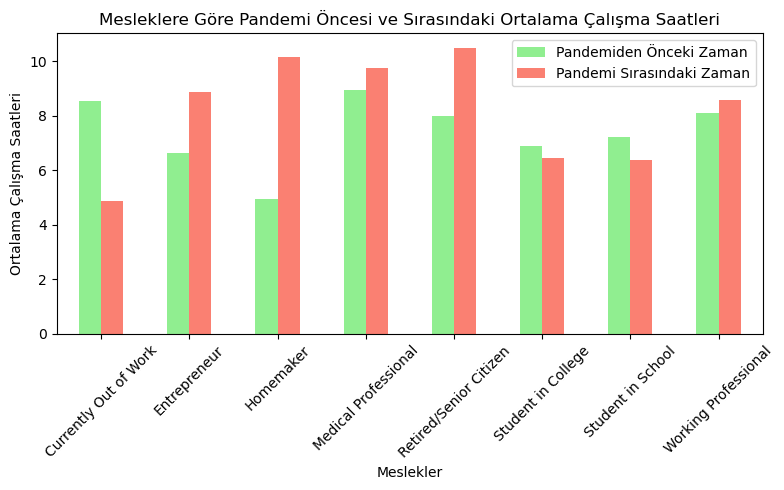

In [24]:
occupation_avg_time = occupation_time_data.groupby('occupation').mean()
occupation_avg_time.plot(kind='bar', figsize=(8, 5), color=['lightgreen','salmon'])
plt.xlabel('Meslekler')
plt.ylabel('Ortalama Çalışma Saatleri')
plt.title('Mesleklere Göre Pandemi Öncesi ve Sırasındaki Ortalama Çalışma Saatleri')
plt.xticks(rotation= 45)
plt.legend(['Pandemiden Önceki Zaman', 'Pandemi Sırasındaki Zaman'])
plt.tight_layout()
plt.show()

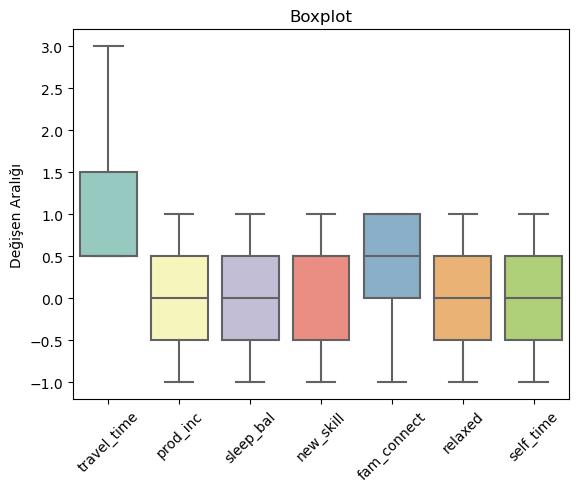

In [25]:
list = ["travel_time","prod_inc","sleep_bal","new_skill","fam_connect","relaxed","self_time"]
sns.boxplot(data.loc[:, list], orient = "v", palette = "Set3")
plt.ylabel('Değişen Aralığı')
plt.title('Boxplot')
plt.xticks(rotation= 45)
plt.show()

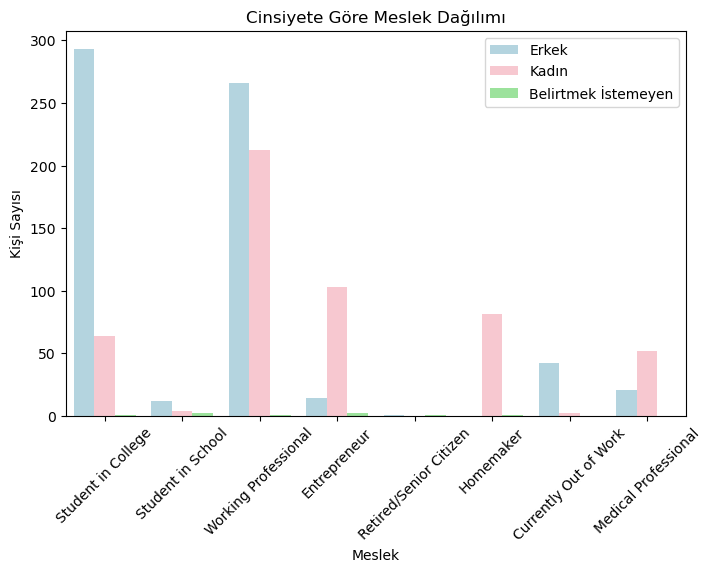

In [26]:
fig= plt.subplots(figsize=(8, 5))
sns.countplot(x='occupation', hue='gender', data=data, palette=['lightblue', 'pink','lightgreen'])
plt.title('Cinsiyete Göre Meslek Dağılımı')
plt.xlabel('Meslek')
plt.ylabel('Kişi Sayısı')
plt.legend(['Erkek', 'Kadın','Belirtmek İstemeyen'])
plt.xticks(rotation= 45)
plt.show()

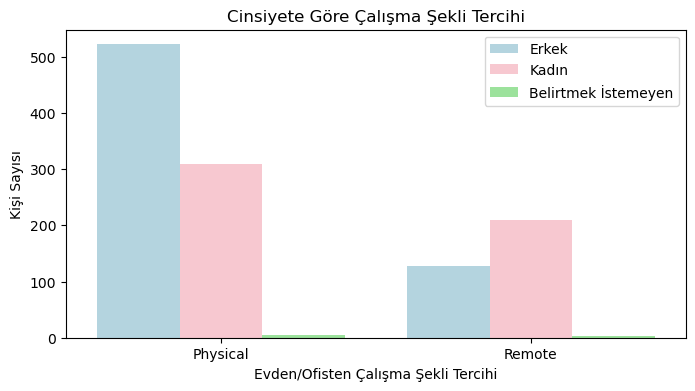

In [27]:
fig= plt.subplots(figsize=(8, 4))
sns.countplot(x='prefer', hue='gender', data=data, palette=['lightblue', 'pink','lightgreen'])
plt.title('Cinsiyete Göre Çalışma Şekli Tercihi')
plt.xlabel('Evden/Ofisten Çalışma Şekli Tercihi')
plt.ylabel('Kişi Sayısı')
plt.legend(['Erkek', 'Kadın','Belirtmek İstemeyen'])
plt.show()

In [28]:
list_numeric= ["time_bp","time_dp","travel_time","prod_inc","sleep_bal","new_skill","fam_connect","relaxed","self_time","like_hw","dislike_hw"]
numeric = data.loc[:, list_numeric]
numeric.head()

,time_bp,time_dp,travel_time,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
0,7,5,0.5,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1
1,7,11,0.5,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110
2,7,7,1.5,1.0,0.0,0.5,0.5,0.5,0.5,1100,111
3,7,7,1.5,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111
4,7,7,1.5,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000


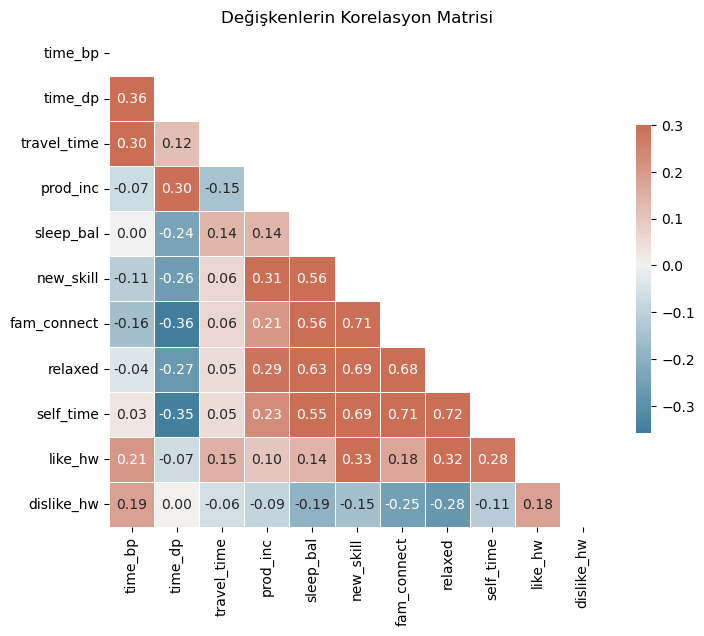

In [29]:
corr= numeric.corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
f,ax= plt.subplots(figsize=(8, 8))
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5}, fmt = ".2f")
plt.title('Değişkenlerin Korelasyon Matrisi')
plt.show()

<a id="6"></aa>
### Modelleme

In [30]:
datac = data.copy()

In [31]:
new_data = pd.get_dummies(datac, columns = ['age', 'gender','occupation','easeof_online','home_env','certaindays_hw'])
new_data.head()

,time_bp,time_dp,travel_time,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,...,easeof_online_4,easeof_online_5,home_env_1,home_env_2,home_env_3,home_env_4,home_env_5,certaindays_hw_Maybe,certaindays_hw_No,certaindays_hw_Yes
0,7,5,0.5,0.0,0.0,0.5,1.0,-0.5,-0.5,100,...,0,0,0,0,1,0,0,0,0,1
1,7,11,0.5,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,...,1,0,0,1,0,0,0,0,1,0
2,7,7,1.5,1.0,0.0,0.5,0.5,0.5,0.5,1100,...,0,0,0,1,0,0,0,0,0,1
3,7,7,1.5,0.0,1.0,0.5,0.0,-1.0,-0.5,100,...,0,0,1,0,0,0,0,0,0,1
4,7,7,1.5,0.0,0.0,0.0,0.0,0.5,0.0,1010,...,0,0,0,1,0,0,0,0,0,1


In [32]:
new_data.shape

(1175, 43)

In [33]:
X = new_data.drop(columns='prefer', axis=1)
y = new_data["prefer"]

In [34]:
ss = StandardScaler()
X_scaler = ss.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size= 0.2, random_state= 0)

In [36]:
X_train.shape

(940, 42)

In [37]:
X_test.shape

(235, 42)

#### Logistic Regression

In [38]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 88.93617021276596

Classification Report: 
               precision    recall  f1-score   support

    Physical       0.90      0.94      0.92       158
      Remote       0.86      0.79      0.82        77

    accuracy                           0.89       235
   macro avg       0.88      0.86      0.87       235
weighted avg       0.89      0.89      0.89       235



#### K- Nearest Neighbors

In [39]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 90.2127659574468

Classification Report: 
               precision    recall  f1-score   support

    Physical       0.91      0.95      0.93       158
      Remote       0.89      0.81      0.84        77

    accuracy                           0.90       235
   macro avg       0.90      0.88      0.89       235
weighted avg       0.90      0.90      0.90       235



#### Decision Tree

In [40]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 91.06382978723404

Classification Report: 
               precision    recall  f1-score   support

    Physical       0.94      0.92      0.93       158
      Remote       0.85      0.88      0.87        77

    accuracy                           0.91       235
   macro avg       0.90      0.90      0.90       235
weighted avg       0.91      0.91      0.91       235



#### Random Forest

In [41]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 82.5531914893617

Classification Report: 
               precision    recall  f1-score   support

    Physical       0.80      0.99      0.88       158
      Remote       0.97      0.48      0.64        77

    accuracy                           0.83       235
   macro avg       0.89      0.74      0.76       235
weighted avg       0.85      0.83      0.81       235



####  Support Vector Machine

In [42]:
svm = svm.SVC(kernel="linear")
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 91.06382978723404

Classification Report: 
               precision    recall  f1-score   support

    Physical       0.91      0.97      0.94       158
      Remote       0.92      0.79      0.85        77

    accuracy                           0.91       235
   macro avg       0.91      0.88      0.89       235
weighted avg       0.91      0.91      0.91       235



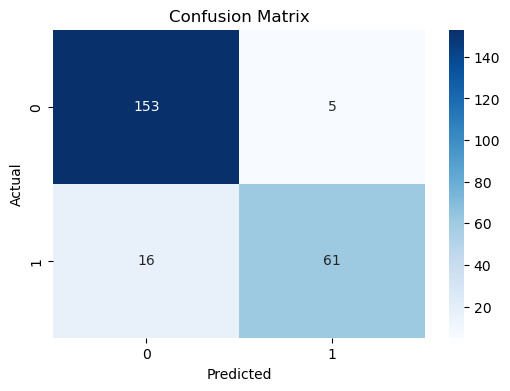

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()